In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
SIM     = "steady"
PATH    = "right_iliac"
CSV     = "/media/marsdenlab/Data1/UQ/0110/"+SIM+'/'+PATH+".csv"

generations = [1,2,3,4]
meshes = ['coarse','medium','fine']

FIG_DIR = "/media/marsdenlab/Data1/UQ/0110/"+SIM

quants  = [
"area",
"radius_actual",
"pressure_0",
"velocity_3",
"vWSS_3_boundary"
]

labels = [
"area",
"radius",
"pressure",
"velocity",
"vWSS"
]

df = pd.read_csv(CSV)

print(df.columns)

FileNotFoundError: File b'/media/marsdenlab/Data1/UQ/0110/csv/steady/right_iliac.csv' does not exist

area (41, 19)


FileNotFoundError: [Errno 2] No such file or directory: '/media/marsdenlab/Data1/UQ/0110/figures/steady_real_out/right_iliac_tube/1/coarse/right_iliac_tube/tube/area.pdf'

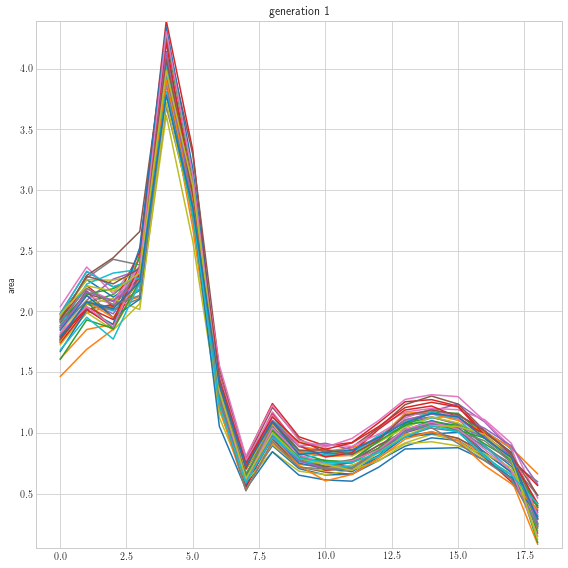

In [7]:
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        
        for q,l in zip(quants,labels):
        
            Y  = np.zeros((Nm,Nx))
            for i,mo in enumerate(models):
                y    = data.loc[data['model']==mo][q].values
                Y[i] = y
            
            ub = df[q].max()
            lb = df[q].min()
            print(q,Y.shape)
            
            fn = os.path.join(FIG_DIR,str(g),m,PATH,"tube",l+".pdf")
            
            plt.figure(figsize=(8,8))
            plt.title('generation ' + str(g))
            plt.plot(Y.T, label=l)
            plt.ylabel(l)
            plt.ylim(lb,ub)
            plt.tight_layout()
            plt.savefig(fn,dpi=300)
            plt.savefig(fn.replace('.pdf','.png'),dpi=300)
            plt.close()

In [11]:
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        
        for q,l in zip(quants,labels):
        
            Y  = np.zeros((Nm,Nx))
            for i,mo in enumerate(models):
                y    = data.loc[data['model']==mo][q].values
                Y[i] = y
            
            ub = df[q].max()
            lb = df[q].min()
            
            fn = os.path.join(FIG_DIR,str(g),m,l+"_std.pdf")

            mu  = np.mean(Y,axis=0) 
            sig = np.std(Y,axis=0)*2

            plt.figure(figsize=(8,8))
            plt.title('generation ' + str(g))
            plt.errorbar(x,y=mu, yerr=sig, fmt='o')
            plt.ylabel(l)
            plt.ylim(lb,ub)
            plt.tight_layout()
            plt.savefig(fn,dpi=300)
            plt.savefig(fn.replace('.pdf','.png'),dpi=300)
            plt.close()

In [12]:
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        
        for q,l in zip(quants,labels):
        
            Y  = np.zeros((Nm,Nx))
            for i,mo in enumerate(models):
                y    = data.loc[data['model']==mo][q].values
                Y[i] = y
            
            fn = os.path.join(FIG_DIR,str(g),m,l+"_std_rel.pdf")

            mu  = np.mean(Y,axis=0) 
            sig = np.std(Y,axis=0)*2
            
            s = sig/np.abs(mu)
            plt.figure(figsize=(8,8))
            plt.title('generation ' + str(g))
            plt.plot(s, linestyle='',marker='o', label='relative std')
            plt.ylabel(l)
            plt.legend()
            plt.ylim(0,1)
            plt.tight_layout()
            plt.savefig(fn,dpi=300)
            plt.savefig(fn.replace('.pdf','.png'),dpi=300)
            plt.close()